In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

### Reading in raw DF

In [2]:
df = pd.read_csv('../datasets/Speed Dating Data.csv', encoding = 'ISO-8859-1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df[['mn_sat', 'tuition']].dtypes

mn_sat     object
tuition    object
dtype: object

In [4]:
df['mn_sat'].isnull().sum()

5245

In [5]:
df['tuition'].isnull().sum()

4795

### Length dummies

### Number of date dummies

### Goal dummies

### Career Dummies

In [6]:
# Filling empty career_cd with 1 (lawyer) where career = law
for i in (df[(df['career'] == 'lawyer') | (df['career'] == 'law')].index):
    df['career_c'][i] = 1
    
# Filling empty career_cd with 7 (business) where career = Economist
for i in (df[df['career'] == 'Economist'].index):
    df['career_c'][i] = 7
    
# Filling empty career_cd with 15 (other) where career = tech prof.
for i in (df[df['career'] == 'tech professional'].index):
    df['career_c'][i] = 15

# Replacing nulls in career_c with 18 or career_not_
df['career_c'].fillna(18, inplace=True)

# Creating dummy list for career
career_dict = {1: 'lawyer_c', 2:'academic_c', 3:'psychologist_c', 4:'doctor/med_c',
               5:'engineer_c', 6:'creative_art/entertain_c', 7:'business/entrepreur',
               8:'real_estate_c', 9:'international/human_affairs_c', 10:'undecided',
               11:'speech_pathology_c', 13:'politics_c', 14:'sports/athletics_c',
               15:'other_c', 16:'journalism_c', 17:'architecture_c'}

df['career_c'].astype(int)
df = pd.concat([df, pd.get_dummies(df['career_c'])], axis=1)
df.rename(columns=career_dict, inplace=True)

### Field Dummies

In [7]:
# Categorizing Operations Research with other Business degrees
for i in (df[df['field'] == 'Operations Research'].index):
    df['field_cd'][i] = 8

# Replacing nulls in field_cd with 19 or field_not_submitted
df['field_cd'].fillna(19, inplace=True)

# Creating dummy list for fields
field_dict = {1:'law', 2:'math', 3:'social science/psych', 4:'med/biotech', 5:'engineering',
              6:'english/journalism', 7:'history, religion, philosophy',
              8:'business, econ, finance', 9:'education', 10:'bio, chem, physics', 11:'social work',
             12:'undecided', 13:'poli-sci, inter affairs', 14:'film', 15:'fine arts', 16:'languages', 17:'architect',
             18:'other', 19:'field_not_submitted'}

df['field_cd'].astype(int)
df = pd.concat([df, pd.get_dummies(df['field_cd'])], axis=1)
df.rename(columns=field_dict, inplace=True)

### Race dummies

In [8]:
# filling NA with 7 or race_not_submitted
df['race'].fillna(7, inplace=True)

race_dict = {1.0:'black',
           2.0:'caucasian',
           3.0:'latino',
           4.0:'asian',
           5.0:'native_american',
           6.0:'other',
           7.0:'race_not_submitted'}

# creating dummies for participant race
df = pd.concat([df, pd.get_dummies(df['race'])], axis=1)
df.rename(columns=race_dict, inplace=True)

race_dict_o = dict(zip([i for i in race_dict.keys()],
        [i + '_o' for i in race_dict.values()]))

# creating dummies for partner race
df = pd.concat([df, pd.get_dummies(df['race_o'])], axis=1)
df.rename(columns=race_dict_o, inplace=True)


In [9]:
df.shape

(8378, 242)

In [10]:
df.isnull().sum().sort_values(ascending=False)

num_in_3                         7710
numdat_3                         6882
expnum                           6578
amb7_2                           6423
sinc7_2                          6423
shar7_2                          6404
fun7_2                           6394
intel7_2                         6394
attr7_2                          6394
shar2_3                          6362
amb5_3                           6362
fun5_3                           6362
intel5_3                         6362
sinc5_3                          6362
attr5_3                          6362
attr7_3                          6362
sinc7_3                          6362
intel7_3                         6362
fun7_3                           6362
amb7_3                           6362
shar7_3                          6362
intel4_3                         5419
fun4_3                           5419
attr4_3                          5419
fun2_3                           5419
attr2_3                          5419
sinc4_3     

### Grouping DF on individual

In [11]:
# Grouping on iid (id of participant), averaging all other stats
iid_df = df.groupby(['iid']).agg('mean')
iid_df['iid'] = iid_df.index
iid_df.head()

,id,gender,idg,condtn,wave,round,position,positin1,order,partner,...,caucasian,latino,asian,other,black_o,caucasian_o,latino_o,asian_o,other_o,iid
iid,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.5,5.5,...,0.0,0.0,1.0,0.0,0.0,0.8,0.1,0.1,0.0,1
2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,5.5,5.5,...,1.0,0.0,0.0,0.0,0.0,0.8,0.1,0.1,0.0,2
3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,5.5,5.5,...,1.0,0.0,0.0,0.0,0.0,0.8,0.1,0.1,0.0,3
4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,5.5,5.5,...,1.0,0.0,0.0,0.0,0.0,0.8,0.1,0.1,0.0,4
5,5.0,0.0,9.0,1.0,1.0,10.0,4.0,NaN,5.5,5.5,...,1.0,0.0,0.0,0.0,0.0,0.8,0.1,0.1,0.0,5


In [12]:
iid_df.to_csv('../datasets/iid.csv', index=False)

### Men vs Women

In [13]:
# stratifiying df based on gender
men_full = df[df['gender'] == 1]
women_full = df[df['gender'] == 0]

In [14]:
men_full.to_csv('../datasets/men_full.csv', index=False)
women_full.to_csv('../datasets/women_full.csv', index=False)

In [15]:
# stratifiying df based on gender
men_agg = iid_df[iid_df['gender'] == 1]
women_agg = iid_df[iid_df['gender'] == 0]

In [16]:
men_agg.to_csv('../datasets/men_agg.csv', index=False)
women_agg.to_csv('../datasets/women_agg.csv', index=False)

### Waves 1-5, 6-11, 12-21

In [17]:
# Stratifying into 3 different groups based on wave
group1_mask = [i in range(0, 6) for i in iid_df['wave']]
group1_df = iid_df[group1_mask]

group2_mask = [i in range(6, 12) for i in iid_df['wave']]
group2_df = iid_df[group2_mask]

group3_mask = [i in range(12, 22) for i in iid_df['wave']]
group3_df = iid_df[group3_mask]

# Dropping any columns for which all are NA
group1_df.dropna(axis=1, how='all', inplace=True)
group2_df.dropna(axis=1, how='all', inplace=True)
group3_df.dropna(axis=1, how='all', inplace=True)

In [18]:
group1_df.to_csv('../datasets/group1.csv', index=False)
group2_df.to_csv('../datasets/group2.csv', index=False)
group3_df.to_csv('../datasets/group3.csv', index=False)

### Recommendation DF

In [19]:
# Features of interest
features = ['age', 'imprace', 'imprelig', 'goal', 'date',
           'go_out', 'exphappy', 'sports', 'tvsports',
            'exercise','dining','museums',
            'art','hiking','gaming','clubbing','reading',
            'tv', 'theater', 'movies', 'concerts',
            'music', 'shopping', 'yoga','attr1_1',
            'sinc1_1','intel1_1','fun1_1','amb1_1',
            'shar1_1','attr2_1',
            'sinc2_1','intel2_1','fun2_1','amb2_1',
            'shar2_1','attr3_1','sinc3_1','fun3_1',
            'intel3_1','amb3_1']

obj_traits = ['attr_o', 'fun_o',
       'intel_o', 'sinc_o', 'amb_o']

In [20]:
# Subsetting full women's df with just features and match success
women_rec = women_full[features + ['dec'] + ['iid']]

# Adding women's objective traits
women_rec = pd.merge(women_rec, women_agg[obj_traits + ['iid']], on='iid').drop(columns='iid')

# Renaming female columns to indicate female
women_rec.columns = women_rec.columns + '_w'

# Adding men's decision, partner id, match column for joining purposes
women_rec['dec_m'] = women_full['dec_o']
women_rec['pid'] = women_full['pid']
women_rec['match'] = women_full['match']

C:\Users\Mason\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'iid' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# Subsetting full men df with features and objective traits
men_rec = men_agg[features + obj_traits]

# Renaming men's columns to designate male
men_rec.columns = men_rec.columns + '_m'

# Carrying over men's id for merge purposes
men_rec['pid'] = men_agg.index

In [22]:
# Merging dfs on male parter id
rec_df = pd.merge(women_rec, men_rec, on=['pid'])
rec_df.head()

,age_w,imprace_w,imprelig_w,goal_w,date_w,go_out_w,exphappy_w,sports_w,tvsports_w,exercise_w,...,attr3_1_m,sinc3_1_m,fun3_1_m,intel3_1_m,amb3_1_m,attr_o_m,fun_o_m,intel_o_m,sinc_o_m,amb_o_m
0,21.0,2.0,4.0,2.0,7.0,1.0,3.0,9.0,2.0,8.0,...,8.0,9.0,7.0,8.0,5.0,5.6,5.4,8.2,8.8,6.4
1,24.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,2.0,7.0,...,8.0,9.0,7.0,8.0,5.0,5.6,5.4,8.2,8.8,6.4
2,25.0,8.0,4.0,6.0,3.0,1.0,4.0,3.0,8.0,7.0,...,8.0,9.0,7.0,8.0,5.0,5.6,5.4,8.2,8.8,6.4
3,23.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,...,8.0,9.0,7.0,8.0,5.0,5.6,5.4,8.2,8.8,6.4
4,21.0,8.0,1.0,2.0,4.0,1.0,7.0,7.0,4.0,7.0,...,8.0,9.0,7.0,8.0,5.0,5.6,5.4,8.2,8.8,6.4


In [23]:
rec_df.columns

Index(['age_w', 'imprace_w', 'imprelig_w', 'goal_w', 'date_w', 'go_out_w',
       'exphappy_w', 'sports_w', 'tvsports_w', 'exercise_w', 'dining_w',
       'museums_w', 'art_w', 'hiking_w', 'gaming_w', 'clubbing_w', 'reading_w',
       'tv_w', 'theater_w', 'movies_w', 'concerts_w', 'music_w', 'shopping_w',
       'yoga_w', 'attr1_1_w', 'sinc1_1_w', 'intel1_1_w', 'fun1_1_w',
       'amb1_1_w', 'shar1_1_w', 'attr2_1_w', 'sinc2_1_w', 'intel2_1_w',
       'fun2_1_w', 'amb2_1_w', 'shar2_1_w', 'attr3_1_w', 'sinc3_1_w',
       'fun3_1_w', 'intel3_1_w', 'amb3_1_w', 'dec_w', 'attr_o_w', 'fun_o_w',
       'intel_o_w', 'sinc_o_w', 'amb_o_w', 'dec_m', 'pid', 'match', 'age_m',
       'imprace_m', 'imprelig_m', 'goal_m', 'date_m', 'go_out_m', 'exphappy_m',
       'sports_m', 'tvsports_m', 'exercise_m', 'dining_m', 'museums_m',
       'art_m', 'hiking_m', 'gaming_m', 'clubbing_m', 'reading_m', 'tv_m',
       'theater_m', 'movies_m', 'concerts_m', 'music_m', 'shopping_m',
       'yoga_m', 'attr1_1_m', 

In [24]:
rec_df.to_csv('../datasets/rec_df.csv', index=False)

### Preliminary Findings

In [ ]:
'hello'.

In [86]:
time_3 = [i for i in men_agg.columns if '_3' in i] + [i for i in men_agg.columns if '_2' in i]

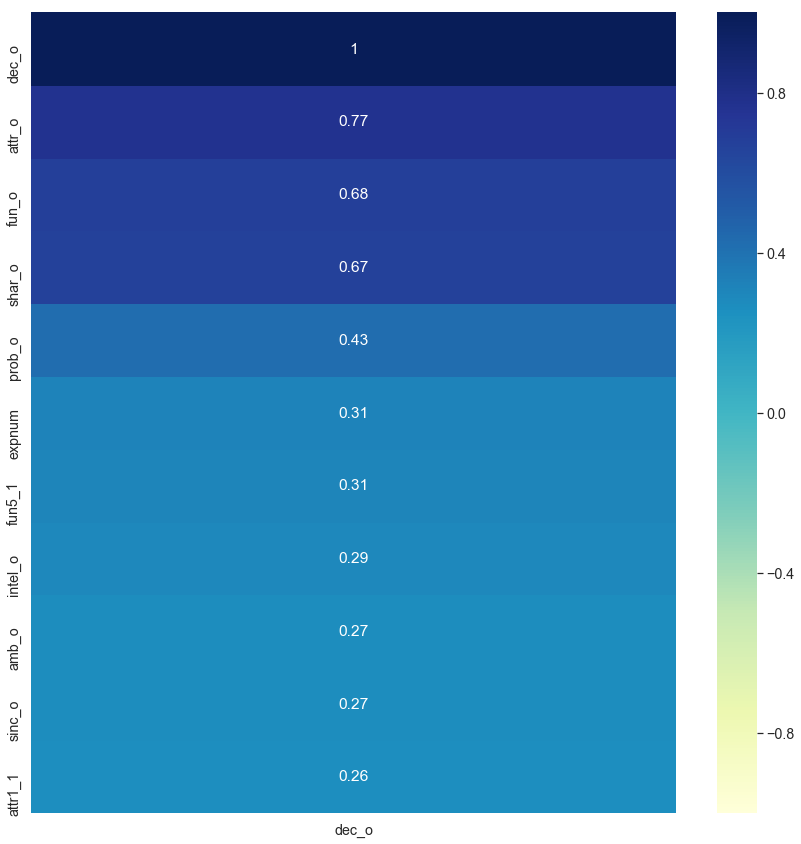

In [139]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(men_agg.drop(columns = ['journalism_c','undecided','speech_pathology_c','gender','match', 'them_cal', 'like_o'] + time_3).corr()[['dec_o']].sort_values('dec_o').tail(11),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../images/top_10_men.png')

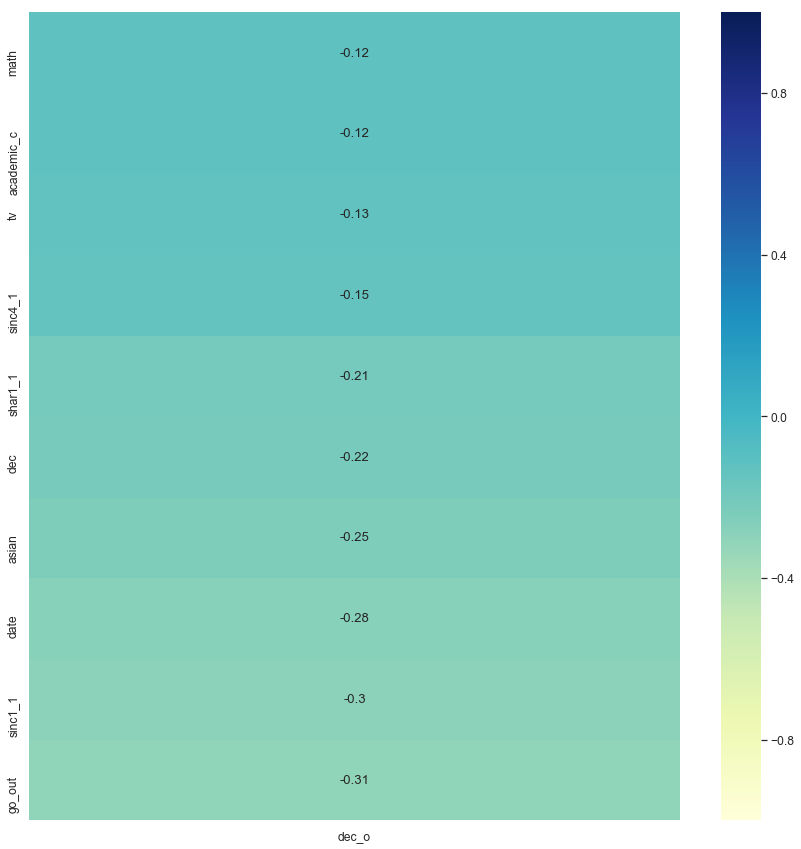

In [135]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(men_agg.drop(columns=['race', 'partner', 'position','condtn', 'shar1_s'] + time_3).corr()[['dec_o']].sort_values('dec_o').head(10),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../images/bottom_10_men.png')

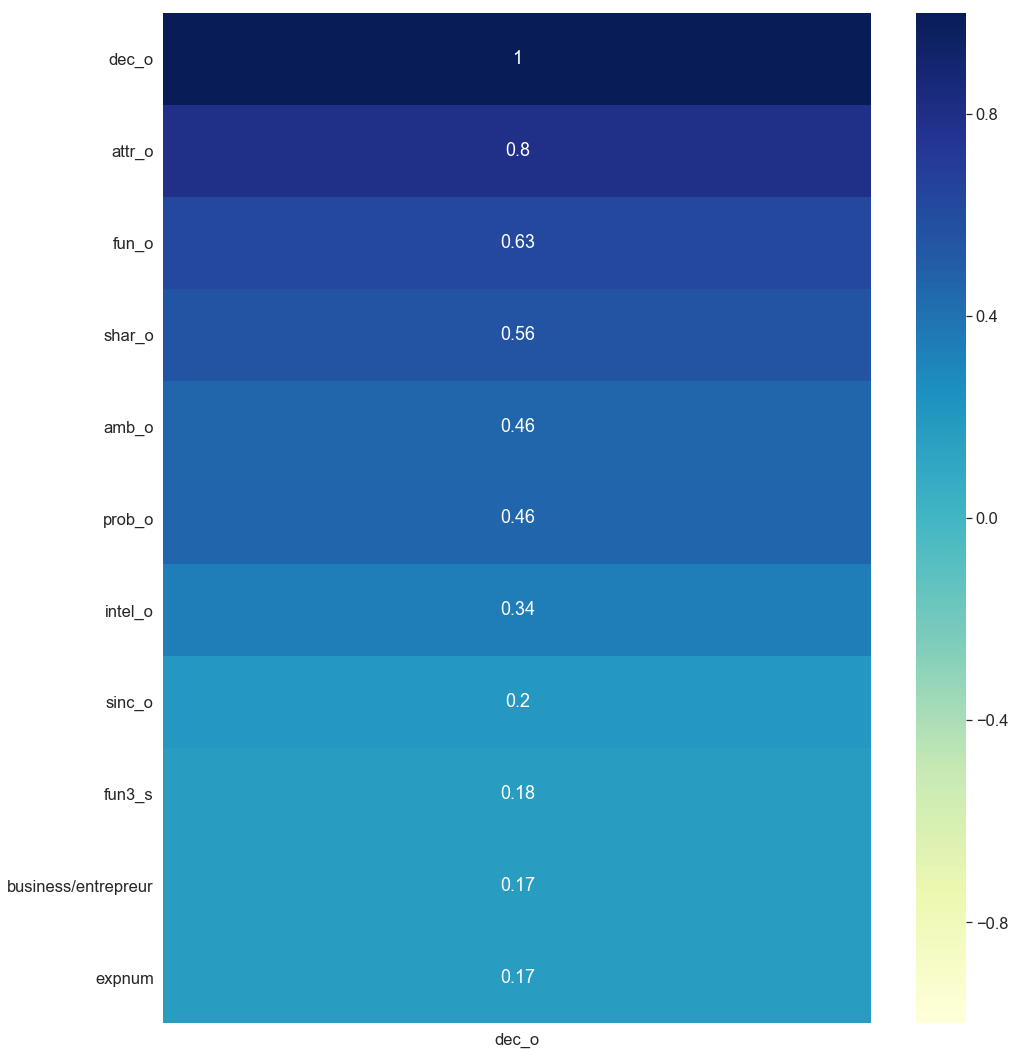

In [140]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(women_agg.drop(columns=['architect', 'undecided', 'architecture_c',
                                   'sports/athletics_c',
                                   'real_estate_c',
                                   'gender', 'match', 'length','them_cal', 'like_o'] + time_3).corr()[['dec_o']].sort_values('dec_o').tail(11),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../images/top_10_women.png')

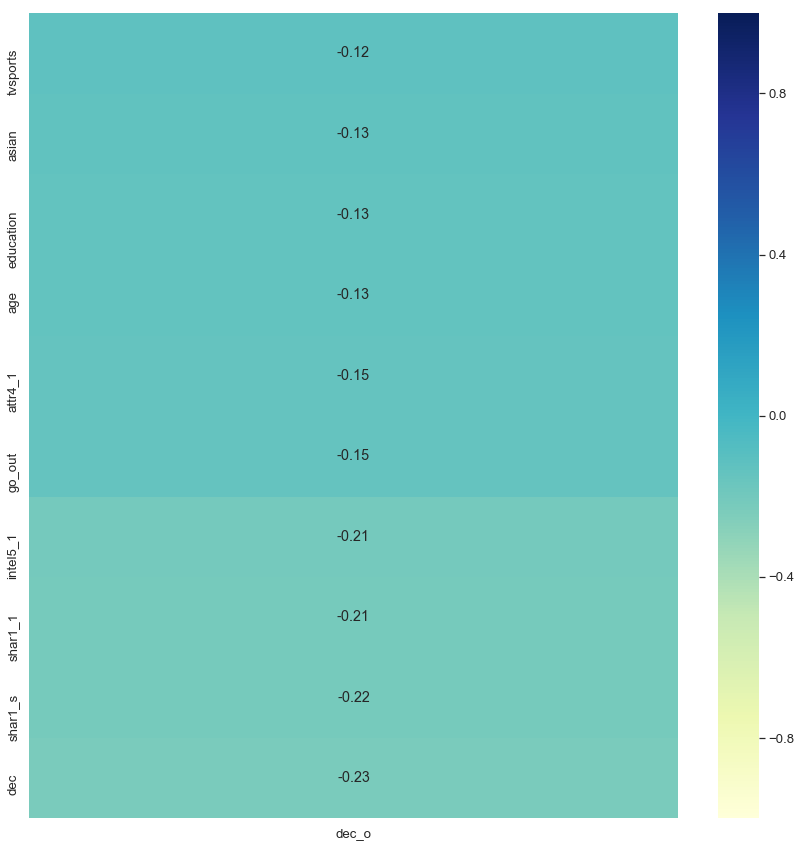

In [141]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(women_agg.drop(columns=['wave','iid','pid',] + time_3).corr()[['dec_o']].sort_values('dec_o').head(10),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../images/bottom_10_Women.png')